In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [2]:
## 데이터 불러오기

Case = pd.read_csv('./Case.csv')
Patientinfo = pd.read_csv('./Patientinfo.csv')
Policy = pd.read_csv('./Policy.csv')
Region = pd.read_csv('./Region.csv')
SearchTrend = pd.read_csv('./SearchTrend.csv')
SeoulFloating = pd.read_csv('./SeoulFloating.csv')
Time = pd.read_csv('./Time.csv')
TimeAge = pd.read_csv('./TimeAge.csv')
TimeGender = pd.read_csv('./TimeGender.csv')
TimeProvince = pd.read_csv('./TimeProvince.csv')
Weather = pd.read_csv('./Weather.csv')

In [3]:
Immigration = Policy[Policy['type']=='Immigration']
Immigration

,policy_id,country,type,gov_policy,detail,start_date,end_date
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN
10,11,Korea,Immigration,Special Immigration Procedure,from France,2020-03-15,NaN
11,12,Korea,Immigration,Special Immigration Procedure,from Germany,2020-03-15,NaN
12,13,Korea,Immigration,Special Immigration Procedure,from Spain,2020-03-15,NaN
13,14,Korea,Immigration,Special Immigration Procedure,from U.K.,2020-03-15,NaN


In [4]:
oversea = Patientinfo[Patientinfo['infection_case']=='overseas inflow']
oversea

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [5]:
overseas = oversea[oversea['contact_number'].notnull()]
overseas.reset_index(inplace=True)
overseas

,index,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
3,7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
4,8,1000000009,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released
5,10,1000000011,female,50s,China,Seoul,Seodaemun-gu,overseas inflow,NaN,23,NaN,2020-02-06,2020-02-29,NaN,released
6,11,1000000012,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-07,2020-02-27,NaN,released
7,301,1000000302,male,10s,Korea,Seoul,Dongjak-gu,overseas inflow,NaN,8,2020-03-19,2020-03-20,NaN,NaN,released
8,357,1000000358,male,20s,Korea,Seoul,etc,overseas inflow,NaN,4,NaN,2020-03-25,NaN,NaN,released
9,358,1000000359,male,20s,Korea,Seoul,Gangnam-gu,overseas inflow,NaN,3,NaN,2020-03-25,NaN,NaN,released


In [17]:
overseas = overseas.sort_values(by=["confirmed_date", "contact_number"]) 
overseas

,index,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
86,2213,2000000001,male,50s,Korea,Gyeonggi-do,Goyang-si,overseas inflow,NaN,16,NaN,2020-01-26,2020-02-12,NaN,released
87,2214,2000000002,male,50s,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,NaN,95,NaN,2020-01-27,2020-02-09,NaN,released
2,3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
1,1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
141,3707,5000000001,female,60s,Korea,Jeollabuk-do,Gunsan-si,overseas inflow,NaN,113,NaN,2020-01-30,2020-02-12,NaN,released
3,7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
63,1600,1300000001,female,40s,Korea,Gwangju,NaN,overseas inflow,NaN,450,2020-01-27,2020-02-03,2020-02-20,NaN,released
4,8,1000000009,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released
88,2218,2000000006,male,30s,Korea,Gyeonggi-do,Guri-si,overseas inflow,NaN,290,NaN,2020-02-05,2020-02-12,NaN,released


In [6]:
overseas = overseas[overseas['contact_number']!='-']

In [7]:
overseas['contact_number'] = overseas['contact_number'].astype('int')
overseas['confirmed_date'] = pd.to_datetime(overseas['confirmed_date'], format = '%Y-%m-%d')

In [8]:
date_overseas = pd.DataFrame(overseas['confirmed_date'].value_counts())
date_overseas.reset_index(inplace=True)
date_overseas = date_overseas.sort_values(by=["index"]) 
date_overseas.reset_index(inplace=True, drop=True)
date_overseas

,index,confirmed_date
0,2020-01-23,1
1,2020-01-26,1
2,2020-01-27,1
3,2020-01-30,3
4,2020-02-02,1
5,2020-02-03,1
6,2020-02-05,2
7,2020-02-06,1
8,2020-02-07,1
9,2020-02-09,1


In [9]:
contact_oversea = overseas.groupby(['confirmed_date'])['contact_number'].sum()
contact_oversea = contact_oversea.to_frame()
contact_oversea.reset_index(inplace=True)
contact_oversea

,confirmed_date,contact_number
0,2020-01-23,75
1,2020-01-26,16
2,2020-01-27,95
3,2020-01-30,153
4,2020-02-02,0
5,2020-02-03,450
6,2020-02-05,358
7,2020-02-06,23
8,2020-02-07,0
9,2020-02-09,40


In [10]:
date_overseas.drop('index', axis=1, inplace=True)
date_overseas.columns = ['date_count']

contact_oversea = pd.concat([contact_oversea, date_overseas], axis=1)
contact_oversea

,confirmed_date,contact_number,date_count
0,2020-01-23,75,1
1,2020-01-26,16,1
2,2020-01-27,95,1
3,2020-01-30,153,3
4,2020-02-02,0,1
5,2020-02-03,450,1
6,2020-02-05,358,2
7,2020-02-06,23,1
8,2020-02-07,0,1
9,2020-02-09,40,1


In [11]:
contact_oversea['contact_number'] = contact_oversea['contact_number'].astype('float')
contact_oversea['date_count'] = contact_oversea['date_count'].astype('float')
contact_oversea['contact_mean'] = contact_oversea['contact_number']/contact_oversea['date_count']
contact_oversea

,confirmed_date,contact_number,date_count,contact_mean
0,2020-01-23,75.0,1.0,75.000000
1,2020-01-26,16.0,1.0,16.000000
2,2020-01-27,95.0,1.0,95.000000
3,2020-01-30,153.0,3.0,51.000000
4,2020-02-02,0.0,1.0,0.000000
5,2020-02-03,450.0,1.0,450.000000
6,2020-02-05,358.0,2.0,179.000000
7,2020-02-06,23.0,1.0,23.000000
8,2020-02-07,0.0,1.0,0.000000
9,2020-02-09,40.0,1.0,40.000000


No handles with labels found to put in legend.


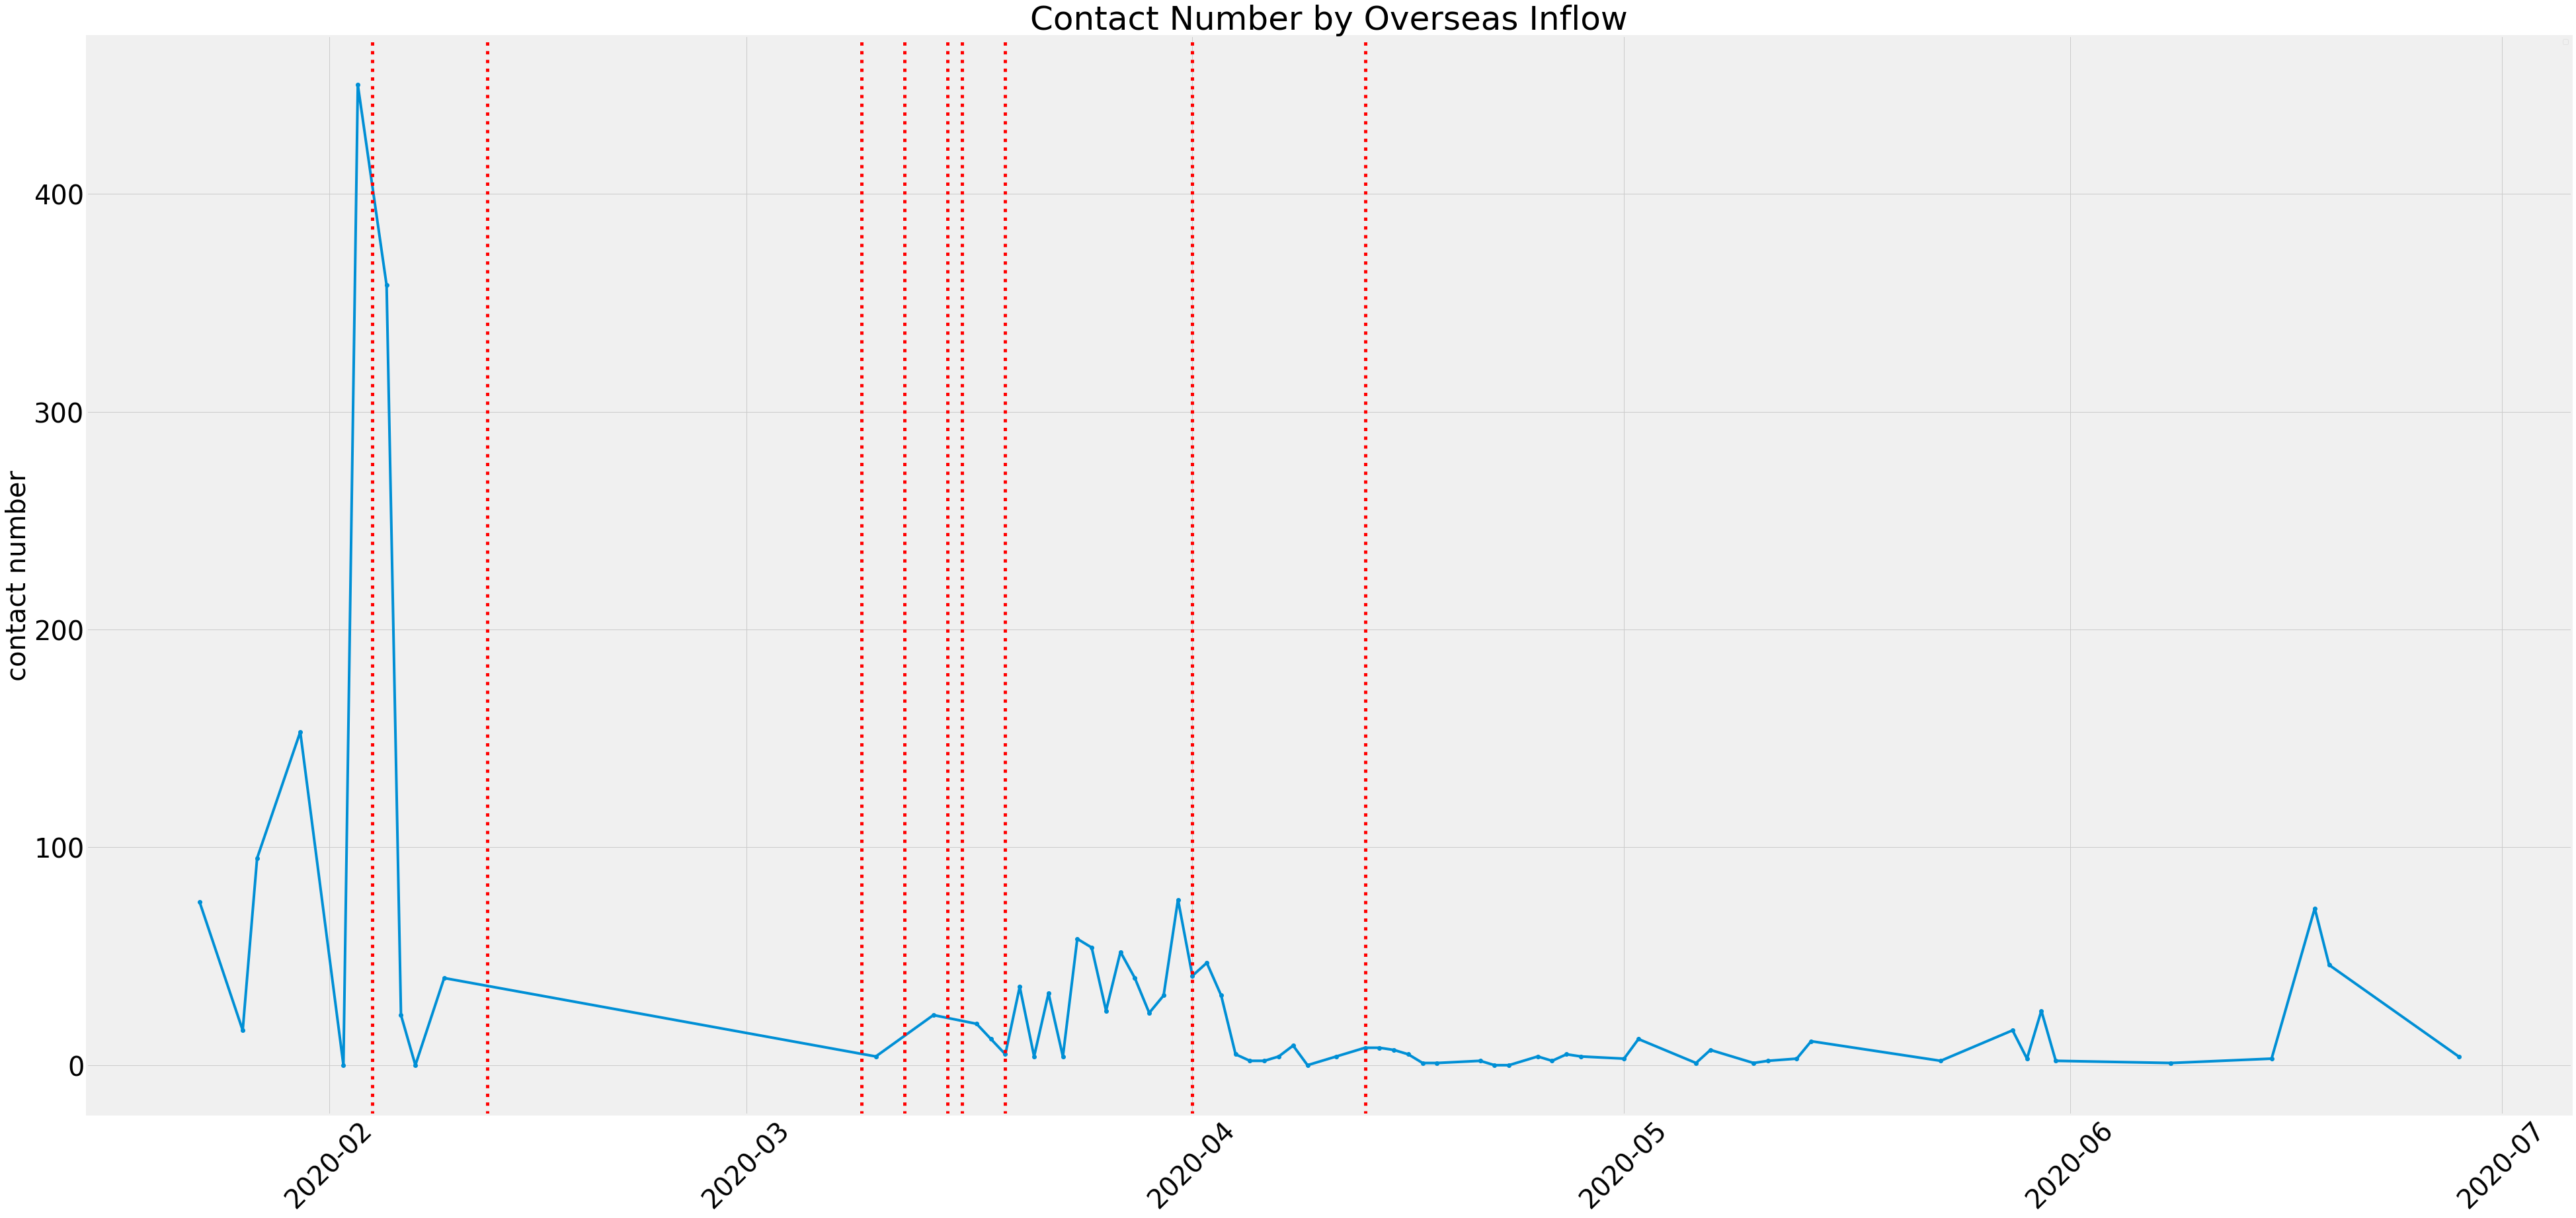

In [14]:
date = contact_oversea['confirmed_date'] #날짜 column
conNum = contact_oversea['contact_number'] #접촉자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [60, 30] # [width, height]

xbefore=date[0:68]
ybefore=conNum[0:68]
plt.plot(xbefore, ybefore, marker='o')

plt.axvline(x=datetime(2020, 2, 4), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 2, 12), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 9), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 12), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 15), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 16), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 19), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 4, 1), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 4, 13), color='r', linestyle=':', linewidth=5)

plt.xticks(rotation=45, fontsize=40) #x축 글자 기울이기
plt.yticks(fontsize=40) #y축 글자 기울이기
plt.ylabel("contact number", fontsize=40)
plt.title('Contact Number by Overseas Inflow', fontsize=50)
plt.legend()
plt.show()

No handles with labels found to put in legend.


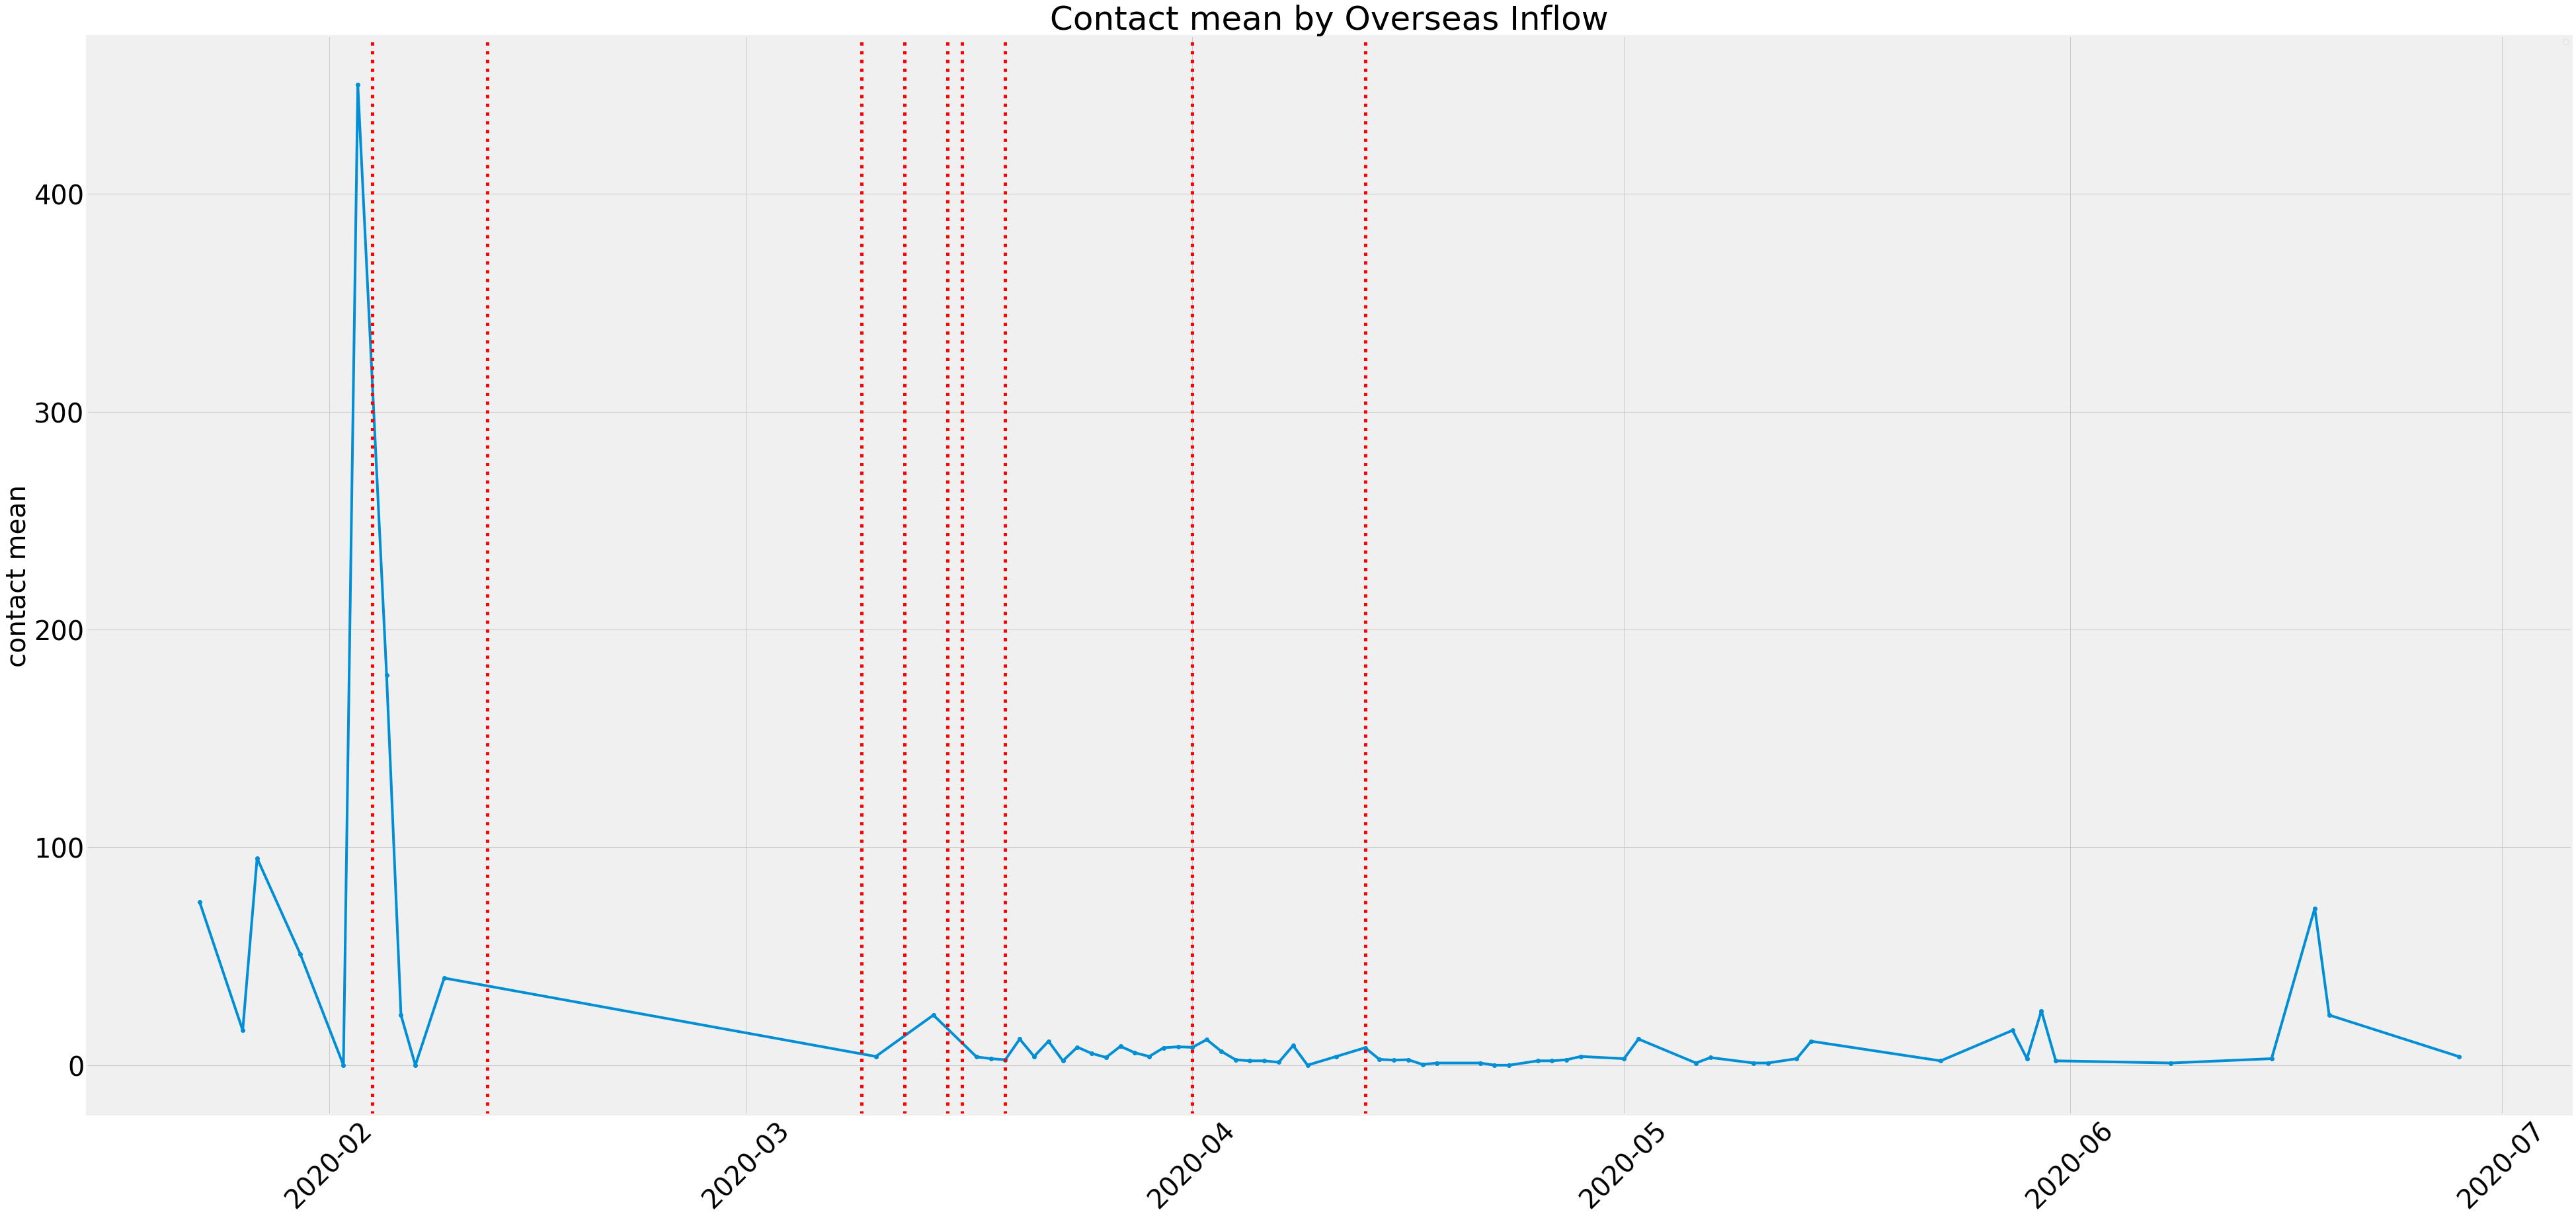

In [13]:
date = contact_oversea['confirmed_date'] #날짜 column
conNum = contact_oversea['contact_mean'] #접촉자 평균 column
plt.figure()
plt.rcParams['figure.figsize'] = [60, 30] # [width, height]

xbefore=date[0:68]
ybefore=conNum[0:68]
plt.plot(xbefore, ybefore, marker='o')

plt.axvline(x=datetime(2020, 2, 4), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 2, 12), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 9), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 12), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 15), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 16), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 3, 19), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 4, 1), color='r', linestyle=':', linewidth=5)
plt.axvline(x=datetime(2020, 4, 13), color='r', linestyle=':', linewidth=5)

plt.xticks(rotation=45, fontsize=40) #x축 글자 기울이기
plt.yticks(fontsize=40) #y축 글자 기울이기
plt.ylabel("contact mean", fontsize=40)
plt.title('Contact mean by Overseas Inflow', fontsize=50)
plt.legend()
plt.show()

확진자 1명의 접촉자가 450명이라 확인 - 실제로 존재!  
[https://www.ajunews.com/view/20200220145445181](https://www.ajunews.com/view/20200220145445181)